In [14]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

WEATHER_PATH = r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_daily_2022.csv" 
weather = pd.read_csv(WEATHER_PATH)

# Detect date column
possible_date_cols = [c for c in weather.columns if "date" in c.lower() or "time" in c.lower()]
if not possible_date_cols:
    raise KeyError("No date/time-like column found in weather dataframe.")
WEATHER_DATE_COL = possible_date_cols[0]

# Detect temperature column
possible_temp_cols = [c for c in weather.columns if "temp" in c.lower() or "tavg" in c.lower() or "tmean" in c.lower()]
if not possible_temp_cols:
    raise KeyError("No temperature-like column found in weather dataframe.")
TEMP_COL = possible_temp_cols[0]

# Keep only needed columns and set index
weather = weather[[WEATHER_DATE_COL, TEMP_COL]].copy()
weather[WEATHER_DATE_COL] = pd.to_datetime(weather[WEATHER_DATE_COL])
weather = weather.sort_values(WEATHER_DATE_COL).set_index(WEATHER_DATE_COL)

weather.head(), WEATHER_DATE_COL, TEMP_COL

(            temp_avg_c
 date                  
 2022-01-01        11.6
 2022-01-02        11.4
 2022-01-03         1.4
 2022-01-04        -2.7
 2022-01-05         3.2,
 'date',
 'temp_avg_c')

In [13]:
import pandas as pd
import glob

# Weather (processed)
WEATHER_PATH = r"Data\Processed\citibike_weather_daily_2022.csv"
weather = pd.read_csv(WEATHER_PATH)

# Trips (raw monthly)
trip_files = sorted(glob.glob(r"Data\Raw\citibike-2022\*.csv"))
if len(trip_files) == 0:
    raise FileNotFoundError("No trip CSV files found under Data\\Raw\\citibike-2022\\*.csv")

# Load trips (use low_memory=False to reduce dtype warnings)
trips = pd.concat((pd.read_csv(f, low_memory=False) for f in trip_files), ignore_index=True)

trips.shape, weather.shape


((895485, 13), (365, 7))

In [15]:
import glob
glob.glob("**/*.csv", recursive=True), glob.glob("**/*.pkl", recursive=True), glob.glob("**/*.xlsx", recursive=True)

(['Data\\Processed\\citibike_weather_daily_2022.csv',
  'Data\\Raw\\weather_lga_2022.csv',
  'Data\\Raw\\citibike-2022\\JC-202201-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202202-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202203-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202204-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202205-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202206-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202207-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202208-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202209-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202210-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202211-citibike-tripdata.csv',
  'Data\\Raw\\citibike-2022\\JC-202212-citibike-tripdata.csv'],
 [],
 [])

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

plt.rcParams["figure.figsize"] = (12, 6)

WEATHER_PATH = r"Data\Processed\citibike_weather_daily_2022.csv"
weather = pd.read_csv(WEATHER_PATH)

weather.head()

,date,daily_trips,avg_trip_duration_min,precip_mm,temp_avg_c,temp_max_c,temp_min_c
0,2022-01-01,592,42.144369,19.3,11.6,13.9,10.0
1,2022-01-02,1248,27.255155,1.0,11.4,15.6,3.9
2,2022-01-03,832,24.766146,0.0,1.4,3.9,-4.3
3,2022-01-04,934,17.051035,0.0,-2.7,2.2,-6.0
4,2022-01-05,914,9.903556,6.1,3.2,8.9,0.0


In [12]:
possible_date_cols = [c for c in weather.columns if "date" in c.lower() or "time" in c.lower()]
possible_date_cols

['date']

In [18]:
possible_temp_cols = [c for c in weather.columns if "temp" in c.lower() or "tavg" in c.lower() or "tmean" in c.lower()]
possible_temp_cols

['temp_avg_c', 'temp_max_c', 'temp_min_c']

In [21]:
full_dates = pd.date_range("2022-01-01", "2022-12-31", freq="D")

weather = weather.reindex(full_dates)
weather[TEMP_COL] = weather[TEMP_COL].interpolate()

weather.loc["2022-01-01":"2022-01-10"]

,daily_trips,avg_trip_duration_min,precip_mm,temp_avg_c,temp_max_c,temp_min_c
2022-01-01,592,42.144369,19.3,11.6,13.9,10.0
2022-01-02,1248,27.255155,1.0,11.4,15.6,3.9
2022-01-03,832,24.766146,0.0,1.4,3.9,-4.3
2022-01-04,934,17.051035,0.0,-2.7,2.2,-6.0
2022-01-05,914,9.903556,6.1,3.2,8.9,0.0
2022-01-06,1297,16.570817,0.0,4.9,6.1,2.2
2022-01-07,459,46.129230,8.4,0.7,2.2,-2.1
2022-01-08,713,81.261220,0.0,-2.5,0.0,-4.9
2022-01-09,636,57.705975,2.8,1.4,5.6,-1.0
2022-01-10,859,98.950931,0.0,1.6,5.6,-3.2


In [23]:
print("weather columns:", weather.columns.tolist())
print("index name:", weather.index.name)
print("first/last index:", weather.index.min(), weather.index.max())

weather columns: ['daily_trips', 'avg_trip_duration_min', 'precip_mm', 'temp_avg_c', 'temp_max_c', 'temp_min_c']
index name: None
first/last index: 2022-01-01 00:00:00 2022-12-31 00:00:00


In [28]:
# Create full 2022 date range
full_dates = pd.date_range("2022-01-01", "2022-12-31", freq="D")

# Reindex to ensure every day exists
weather = weather.reindex(full_dates)

# Optional: interpolate missing temps
weather[TEMP_COL] = weather[TEMP_COL].interpolate()

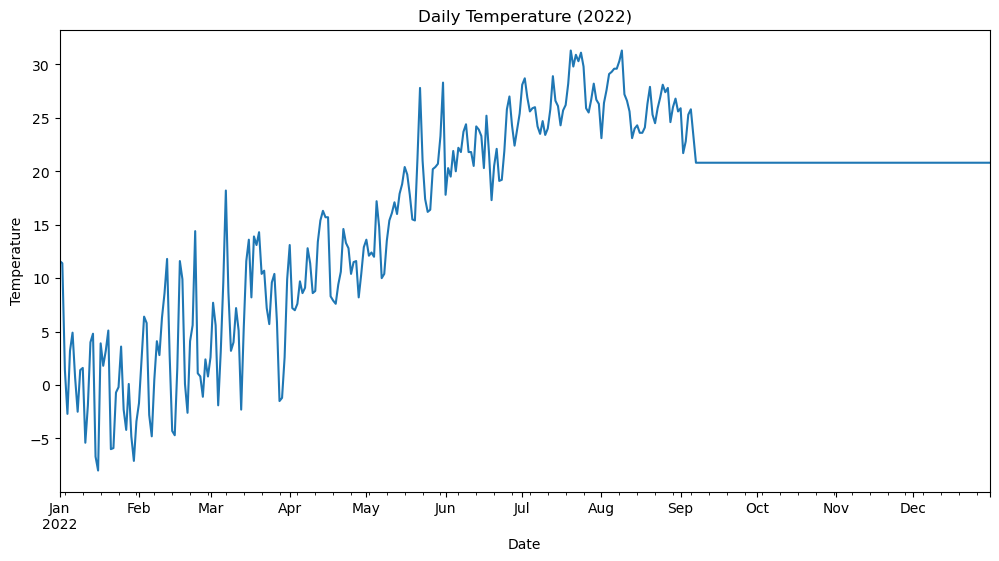

In [29]:
TEMP_COL = possible_temp_cols[0]  

ax = weather[TEMP_COL].plot(
    title="Daily Temperature (2022)",
    xlabel="Date",
    ylabel="Temperature"
)
plt.show()

In [16]:
trip_files = sorted(glob.glob(r"Data\Raw\citibike-2022\*.csv"))
trip_files

['Data\\Raw\\citibike-2022\\JC-202201-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202202-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202203-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202204-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202205-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202206-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202207-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202208-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202209-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202210-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202211-citibike-tripdata.csv',
 'Data\\Raw\\citibike-2022\\JC-202212-citibike-tripdata.csv']

In [17]:
trips = pd.concat((pd.read_csv(f) for f in trip_files), ignore_index=True)
trips.shape, trips.columns.tolist()[:20]

((895485, 13),
 ['ride_id',
  'rideable_type',
  'started_at',
  'ended_at',
  'start_station_name',
  'start_station_id',
  'end_station_name',
  'end_station_id',
  'start_lat',
  'start_lng',
  'end_lat',
  'end_lng',
  'member_casual'])

In [18]:
[c for c in trips.columns if "start" in c.lower() and ("time" in c.lower() or "at" in c.lower())]

['started_at', 'start_station_name', 'start_station_id', 'start_lat']

In [23]:
trips_per_day = (
    trips
    .set_index('started_at')
    .sort_index()
    .loc["2022-01-01":"2022-12-31"]
    .resample("D")
    .size()
    .rename("trip_count")
)

weather_2022 = weather.loc["2022-01-01":"2022-12-31"].copy()
weather_2022 = weather_2022.join(trips_per_day, how="left")
weather_2022["trip_count"] = weather_2022["trip_count"].fillna(0).astype(int)

weather_2022[["trip_count", TEMP_COL]].head()

,trip_count,temp_avg_c
date,,
2022-01-01,592,11.6
2022-01-02,1248,11.4
2022-01-03,832,1.4
2022-01-04,934,-2.7
2022-01-05,914,3.2


In [24]:
# 1) Trip start column (re)definition
if "started_at" in trips.columns:
    TRIP_START_COL = "started_at"
elif "starttime" in trips.columns:
    TRIP_START_COL = "starttime"
else:
    raise KeyError("Could not find 'started_at' or 'starttime' in trips.columns")

trips[TRIP_START_COL] = pd.to_datetime(trips[TRIP_START_COL])

# 2) Daily trip counts for 2022
trips_per_day = (
    trips
    .set_index(TRIP_START_COL)
    .sort_index()
    .loc["2022-01-01":"2022-12-31"]
    .resample("D")
    .size()
    .rename("trip_count")
)

# 3) Weather subset + merge
weather_2022 = weather.loc["2022-01-01":"2022-12-31"].copy()
weather_2022 = weather_2022.join(trips_per_day, how="left")
weather_2022["trip_count"] = weather_2022["trip_count"].fillna(0).astype(int)

weather_2022.head()

,daily_trips,avg_trip_duration_min,precip_mm,temp_avg_c,temp_max_c,temp_min_c,trip_count
date,,,,,,,
2022-01-01,592,42.144369,19.3,11.6,13.9,10.0,592
2022-01-02,1248,27.255155,1.0,11.4,15.6,3.9,1248
2022-01-03,832,24.766146,0.0,1.4,3.9,-4.3,832
2022-01-04,934,17.051035,0.0,-2.7,2.2,-6.0,934
2022-01-05,914,9.903556,6.1,3.2,8.9,0.0,914


In [40]:
df = pd.read_csv(
    r"C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed/citibike_weather_merged_2022.csv",
    parse_dates=["date"],
    index_col="date"
)

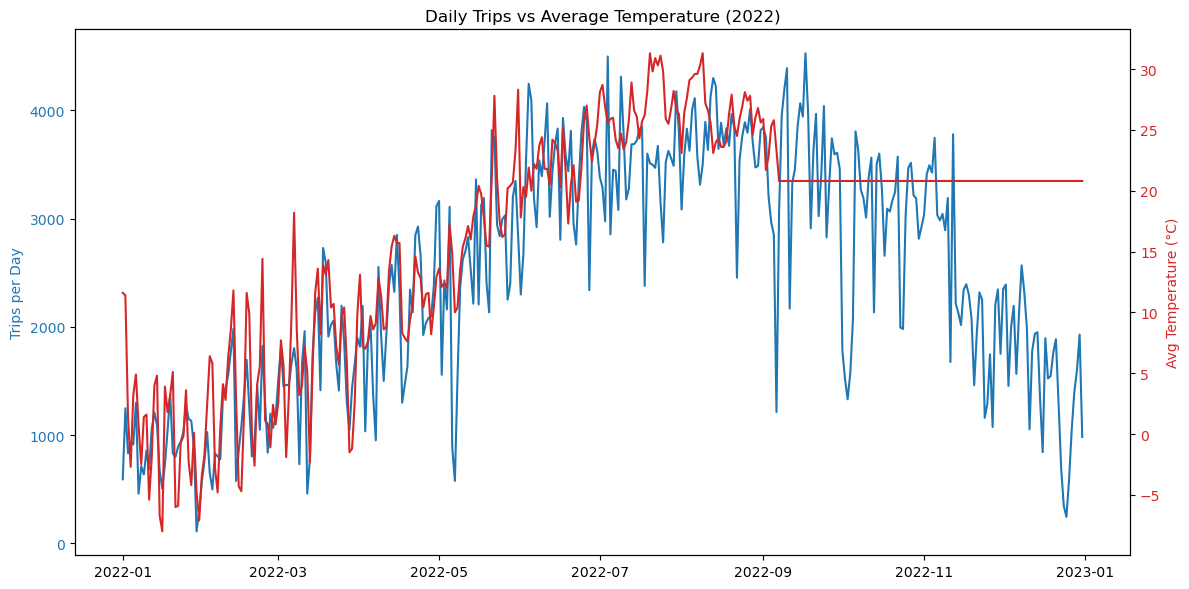

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df["daily_trips"], color="tab:blue", label="Trips")
ax1.set_ylabel("Trips per Day", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(df.index, df["temp_avg_c"], color="tab:red", label="Temperature")
ax2.set_ylabel("Avg Temperature (°C)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

ax1.set_title("Daily Trips vs Average Temperature (2022)")
fig.tight_layout()
plt.show()

In [37]:
df.columns.tolist()

['daily_trips', 'temp_avg_c']

Pandas was used to generate the line plots via the `.plot()` method, which uses
Matplotlib as its backend. For the dual-axis visualization, Matplotlib’s
object-oriented paradigm was applied by explicitly creating a figure and axes
using `plt.subplots()` and adding a secondary y-axis with `ax.twinx()`.

Each pandas plot was directed to a specific Matplotlib axis using the `ax=`
parameter. This approach provides fine-grained control over multiple axes and
is preferred over the state-based pyplot paradigm for more complex plots.